<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/05_05_01_dmd_basics_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [700]:
import numpy as np
import matplotlib.pyplot as plt

In [701]:
#Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

In [702]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 400)
t = np.linspace(0, 4*np.pi, 201)
dt = t[1] - t[0]
xx, tt = np.meshgrid(xi, t)
X = f1(xx, tt) + f2(xx, tt)

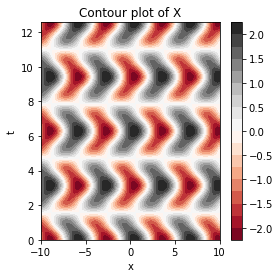

In [703]:
plt.figure(figsize=(4, 4))
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()


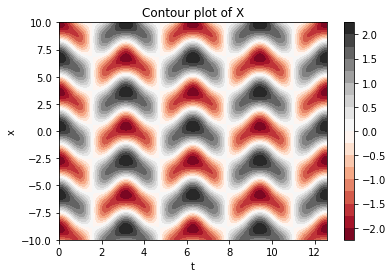

In [704]:
plt.figure(figsize=(6, 4))
plt.contourf(tt.T, xx.T, np.real(X.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [705]:
X_1 = X.T[:, :-1]
X_2 = X.T[:, 1:]


In [706]:
# Step 1 - SVD
U, Sigma, VT = np.linalg.svd(X_1,full_matrices=False)
print(U.shape,Sigma.shape, VT.shape)


(400, 200) (200,) (200, 200)


c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


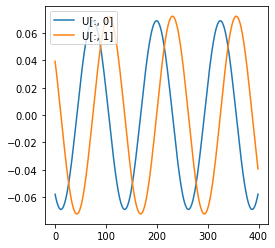

In [707]:

plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
#plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3], label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()


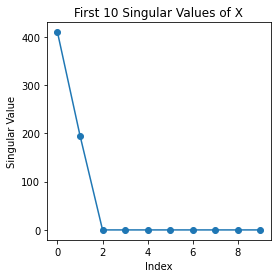

In [708]:
plt.figure(figsize=(4, 4))
plt.plot(Sigma[:10], 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [709]:
print(Sigma[:4])


[4.09197304e+02 1.95293092e+02 7.93845315e-14 6.04551120e-14]


c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


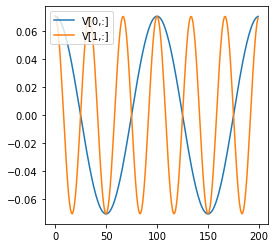

In [710]:
plt.figure(figsize=(4, 4))
plt.plot(V[0,:], label='V[0,:]')
plt.plot(V[1,:], label='V[1,:]')
#plt.plot(V[2,:], label='V[2,:]')
#plt.plot(V[3,:], label='V[3,:]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [711]:
U, Sigma, VT = U[:, :2], Sigma[:2], VT[:2, :]
print(U.shape, np.diag(Sigma).shape, VT.shape)

(400, 2) (2, 2) (2, 200)


In [712]:
print(X_2.shape)


(400, 200)


In [713]:
print(U[:2,:2])


[[-0.05799776-1.56125113e-17j  0.03939525+2.42861287e-17j]
 [-0.05980901+2.35055031e-16j  0.03630137-5.04804532e-16j]]


In [714]:
A_tilde = np.linalg.multi_dot([U.conj().T, X_2, VT.conj().T, np.linalg.inv(np.diag(Sigma))])
Lambda, W = np.linalg.eig(A_tilde)
print(Lambda.shape)

(2,)


In [715]:
Phi = np.linalg.multi_dot([X_2, VT.conj().T, np.linalg.inv(np.diag(Sigma)), W])

print(Phi.shape)


(400, 2)


c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


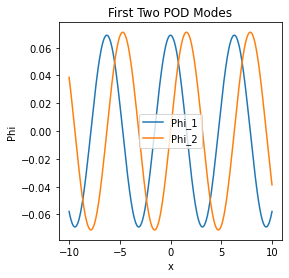

In [716]:
plt.figure(figsize=(4, 4))
plt.plot(xi, Phi[:, 0], '-', label='Phi_1')
plt.plot(xi, Phi[:, 1], '-', label='Phi_2')
plt.xlabel('x')
plt.ylabel('Phi')
plt.legend()
plt.title('First Two POD Modes')
plt.show()

In [717]:
b = np.linalg.lstsq(Phi, X_1[:,0], rcond=None)[0]




In [718]:
b.shape


(2,)

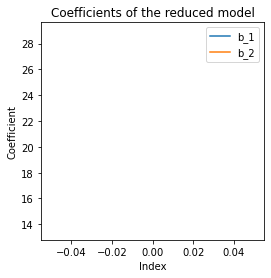

In [719]:
plt.figure(figsize=(4, 4))
plt.plot(b[0], '-', label='b_1')
plt.plot(b[1], '-', label='b_2')
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.legend()
plt.title('Coefficients of the reduced model')
plt.show()

In [720]:
Omega = np.log(Lambda)/dt


In [721]:
print(Omega)


[1.40874829e-14+1.j 9.55270764e-15+3.j]


In [722]:
#b = np.hstack([b, np.zeros((2, 1))])  # Add an extra column to b
#print(b.shape)
#print(b.reshape(2,-1).shape)

In [723]:

t_exp = np.arange(X.T.shape[1]) * dt
print(t_exp.shape)
t_total = t_exp[200]
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * b.reshape(b.shape[0], -1)




(201,)


c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\garre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


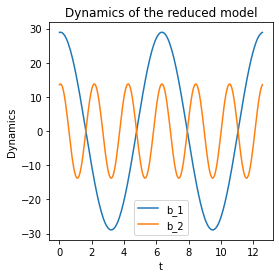

In [724]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='b_1')
plt.plot(t_exp, dynamics[1, :], '-', label='b_2')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [725]:
X_dmd = Phi @ dynamics



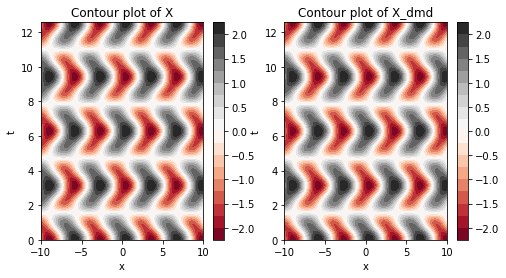

In [726]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 2, 2)
plt.contourf(xx, tt, np.real(X_dmd.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

plt.show()